<a href="https://colab.research.google.com/github/vaghasiatirth24/Machine-Learning/blob/main/ML_HW_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
import time
import math

sns.set()
import numpy as np
from collections import defaultdict

from numpy import dot
from numpy.linalg import norm

In [82]:
def lineToTuple(line):
    cleanLine = line.strip()
    cleanLine = cleanLine.replace('"', '')
    lineList = cleanLine.split(",")
    stringsToNumbers(lineList)
    lineTuple = tuple(lineList)
    return lineTuple

In [83]:
def stringsToNumbers(myList):
    for i in range(len(myList)):
        if (isValidNumberString(myList[i])):
            myList[i] = float(myList[i])


In [84]:
def isValidNumberString(s):
  if len(s) == 0:
    return False
  if  len(s) > 1 and s[0] == "-":
      s = s[1:]
  for c in s:
    if c not in "0123456789.":
      return False
  return True

In [85]:
data = [
    [3, 5],
    [3, 4],
    [2, 8],
    [2, 3],
    [6, 2],
    [6, 4],
    [7, 3],
    [7, 4],
    [8, 5],
    [7, 6]
]

In [86]:
def loadCSV(fileName):
    fileHandler = open(fileName, "rt")
    lines = fileHandler.readlines()
    fileHandler.close()
    del lines[0]
    dataset = []
    for line in lines:
        instance = lineToTuple(line)
        dataset.append(instance)
    return dataset

In [87]:
def euclidean_distance(point1, point2):
    distance = 0
    for a,b in zip(point1, point2):
        distance += pow((a-b), 2)
    return math.sqrt(distance)

In [88]:
def manhattan_distance(point1, point2):
    distance = 0
    for a,b in zip(point1, point2):
        distance += abs(a-b)
    return distance

In [89]:
def cosine_similarity(point1, point2):
  A = np.array(point1)
  B = np.array(point2)
  dist = 1 - np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B))
  return dist

In [90]:
def jaccard(A, B):
    return 1 - (np.sum(np.minimum(A,B), axis = 0)/np.sum(np.maximum(A, B), axis = 0)) 

In [91]:
def calculate_centroid(cluster):
  n = len(cluster[0])
  if isinstance(cluster[0][-1], str):
    centroid = [0]*(n-1)

    for i in range(n-1):
      for point in cluster:
        centroid[i] += point[i]
      centroid[i] = centroid[i]/len(cluster)
  else:
    centroid = [0]*n

    for i in range(n):
      for point in cluster:
        centroid[i] += point[i]
      centroid[i] = centroid[i]/len(cluster)

  
  return centroid

In [92]:
def draw_nd_scatter(clusters, centroid_centers):
  for key in clusters:
    x = []
    y = []
    cluster = clusters[key]
    for c in cluster:
      x.append(c[0])
      y.append(c[1])
    plt.scatter(x, y, marker='o')

  for point in centroid_centers:
    plt.scatter(point[0], point[1], marker='+')
  
  plt.show()

In [93]:
def label_cluster(cluster):
  cl = defaultdict(int)
  for point in cluster:
    cl[point[-1]] += 1
  return cl

In [94]:
class KMeans:
  def __init__(self, n_clusters=3, max_iters=300, init_centroids=None, d_func=euclidean_distance, show_sse=False, show_first_centroid=False, centroid_stop=True):
    self.n_clusters = n_clusters
    self.max_iters = max_iters
    self.init_centroids = init_centroids
    self.d_func = d_func
    self.sse_list = []
    self.show_first_centroid = show_first_centroid
    self.show_sse = show_sse
    self.centroid_stop = centroid_stop

  def fit(self, data):
    start = time.time()
    if self.init_centroids is None:
      random_choice = np.random.choice(range(len(data)), self.n_clusters, replace=False)
      centroids = []

      for choice in random_choice:
        if isinstance(data[choice][-1], str):
          centroids.append(data[choice][:-1])
        else:
          centroids.append(data[choice])
      
      self.init_centroids = centroids
    
    for loop in range(self.max_iters): 
      clusters = defaultdict(list)
      sse = 0


      for point in data:
        temp_centroid = -1
        min_dist = 99999999
        for i, centroid in enumerate(self.init_centroids):
          if isinstance(point[-1], str):
            d = self.d_func(point[:-1], centroid)
          else:
            d = self.d_func(point, centroid)
          if d < min_dist:
            temp_centroid = i
            min_dist = d
        
        clusters[temp_centroid].append(point)

      prev_centroids = self.init_centroids.copy()
      for key in clusters.keys():
        cluster = clusters[key]
        self.init_centroids[key] = calculate_centroid(cluster)

      if loop == 1 and self.show_first_centroid == True:
        print("Centroids after first iteration: ", self.init_centroids)

      if self.centroid_stop == True and self.init_centroids == prev_centroids:
        break

      for key in clusters.keys():
        cluster = clusters[key]
        ce = self.init_centroids[key]

        for p in cluster:
          sse += euclidean_distance(ce, p)

      if self.show_sse == True and loop > 1 and self.sse_list[-1] <= sse:
        self.sse_list.pop()
        break

      self.sse_list.append(sse)

    print("Time taken:", time.time() - start)
    print("Number of iterations:", loop)
    return [self.init_centroids, clusters]


Task 1: Question 1

Centroids after first iteration:  [[4.0, 6.333333333333333], [5.571428571428571, 3.5714285714285716]]
Time taken: 0.0006241798400878906
Number of iterations: 1
Final Cluster 1 : [[3, 5], [2, 8], [7, 6]]
Final Cluster 2 : [[3, 4], [2, 3], [6, 2], [6, 4], [7, 3], [7, 4], [8, 5]]


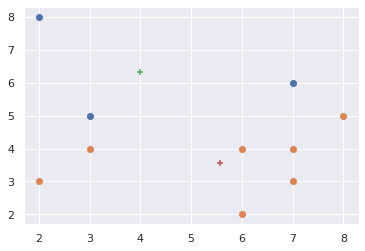

In [95]:
kmeans = KMeans(n_clusters=2, init_centroids=[[4, 6],[5, 4]], d_func=manhattan_distance, show_first_centroid=True)
[centroid_centers, clusters] = kmeans.fit(data)

for key in clusters:
  print("Final Cluster", key+1, ":", clusters[key])

draw_nd_scatter(clusters, centroid_centers)

Task 1: Question 2

Centroids after first iteration:  [[2.5, 5.0], [6.833333333333333, 4.0]]
Time taken: 0.0009088516235351562
Number of iterations: 2
Final Cluster 1 : [[3, 5], [3, 4], [2, 8], [2, 3]]
Final Cluster 2 : [[6, 2], [6, 4], [7, 3], [7, 4], [8, 5], [7, 6]]


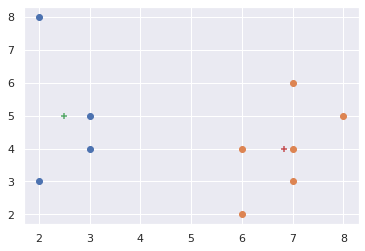

[19.699965039247633, 14.444951661105069]


In [96]:
kmeans = KMeans(n_clusters=2, init_centroids=[[4, 6],[5, 4]], d_func=euclidean_distance,show_first_centroid=True)
[centroid_centers, clusters] = kmeans.fit(data)

for key in clusters:
  print("Final Cluster", key+1, ":", clusters[key])

draw_nd_scatter(clusters, centroid_centers)
print(kmeans.sse_list)

 Task 1: Question 3

Centroids after first iteration:  [[2.5, 5.0], [6.833333333333333, 4.0]]
Time taken: 0.00027632713317871094
Number of iterations: 1
Final Cluster 1 : [[3, 5], [3, 4], [2, 8], [2, 3]]
Final Cluster 2 : [[6, 2], [6, 4], [7, 3], [7, 4], [8, 5], [7, 6]]


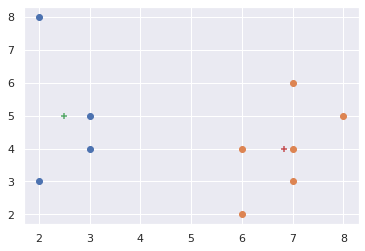

In [97]:
kmeans = KMeans(n_clusters=2, init_centroids=[[3, 3], [8, 3]], d_func=manhattan_distance, show_first_centroid=True)
[centroid_centers, clusters] = kmeans.fit(data)

for key in clusters:
  print("Final Cluster", key+1, ":", clusters[key])

draw_nd_scatter(clusters, centroid_centers)

Task 1: Question 4

Centroids after first iteration:  [[4.857142857142857, 3.5714285714285716], [5.666666666666667, 6.333333333333333]]
Time taken: 0.0004036426544189453
Number of iterations: 1
Final Cluster 1 : [[3, 5], [3, 4], [2, 3], [6, 2], [6, 4], [7, 3], [7, 4]]
Final Cluster 2 : [[2, 8], [8, 5], [7, 6]]


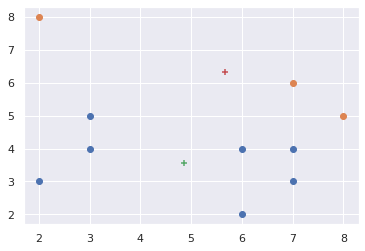

In [98]:
kmeans = KMeans(n_clusters=2, init_centroids=[[3, 2], [4, 8]], d_func=manhattan_distance, show_first_centroid=True)
[centroid_centers, clusters] = kmeans.fit(data)

for key in clusters:
  print("Final Cluster", key+1, ":", clusters[key])

draw_nd_scatter(clusters, centroid_centers)

Task 2:

In [99]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2021-03-15 03:49:27--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data.1’

iris.data.1         100%[===================>]   4.44K  --.-KB/s    in 0s      

2021-03-15 03:49:27 (163 MB/s) - ‘iris.data.1’ saved [4551/4551]



In [100]:
raw_iris_data = loadCSV('iris.data')

In [101]:
iris_data = []
del raw_iris_data[-1]

for row in raw_iris_data:
  iris_data.append([
    row[0],
    row[1],
    row[2],
    row[3],
    row[4]
  ])

print(iris_data)

[[4.9, 3.0, 1.4, 0.2, 'Iris-setosa'], [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'], [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'], [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'], [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'], [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'], [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'], [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'], [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'], [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'], [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'], [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'], [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'], [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'], [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'], [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'], [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'], [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'], [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'], [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'], [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'], [4.6, 3.6, 1.0, 0.2, 'Iris-setosa'], [5.1, 3.3, 1.7, 0.5, 'Iris-setosa'], [4.8, 3.4, 1.9, 0.2, 'Iris-setosa'], [5.0, 3.0, 1.6, 0.2, 'Iris-setosa'], [5.0, 3.4, 1.6, 0.4, 'Iris-setosa'], [5.2, 3.5, 1.5, 0.2, 'Iris-setosa'], 

In [102]:
original_labels = dict(label_cluster(iris_data))

Questions 1,2,3:

Time taken: 0.006669521331787109
Number of iterations: 6


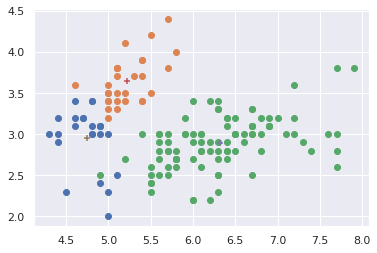

SSE = [122.87432218300357, 122.17452984211882, 122.30149842310874, 123.4907566339156, 123.6646998684171, 123.65467412012842]
Original Labels:  {'Iris-setosa': 49, 'Iris-versicolor': 50, 'Iris-virginica': 50}
Predicted Labels:  {'Iris-setosa': 29, 'Iris-versicolor': 0, 'Iris-virginica': 50}
Accuracy = 0.5302013422818792


In [103]:
kmeans = KMeans()
[centroid_centers, clusters] = kmeans.fit(iris_data)

labels = {'Iris-setosa': 0, 'Iris-versicolor': 0, 'Iris-virginica': 0}

for key in clusters:
  d = dict(label_cluster(clusters[key]))
  mx = 0
  s = 0
  label = ""
  for k in d:
    s += d[k]
    if d[k] > mx:
      mx = d[k]
      label = k
  labels[label] = mx

draw_nd_scatter(clusters, centroid_centers)

print("SSE =",kmeans.sse_list)
print("Original Labels: ", original_labels)
print("Predicted Labels: ", labels)

total = 0
mismatch = 0

for l in original_labels:
  total += original_labels[l]
  mismatch += abs(original_labels[l] - labels[l])

accuracy = (total - mismatch) / total

print("Accuracy =",accuracy)

Time taken: 0.05747866630554199
Number of iterations: 6


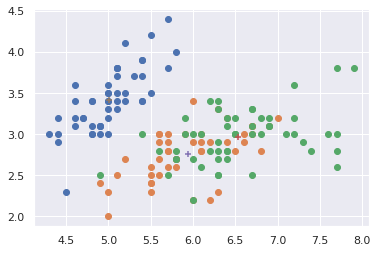

SSE = [212.1707165934719, 126.07557691628614, 118.78565139633173, 110.34236433248935, 103.86954291453813, 101.42234214063515]
Original Labels:  {'Iris-setosa': 49, 'Iris-versicolor': 50, 'Iris-virginica': 50}
Predicted Labels:  {'Iris-setosa': 49, 'Iris-versicolor': 46, 'Iris-virginica': 50}
Accuracy = 0.9731543624161074


In [104]:
kmeans = KMeans(d_func=cosine_similarity)
[centroid_centers, clusters] = kmeans.fit(iris_data)

labels = {'Iris-setosa': 0, 'Iris-versicolor': 0, 'Iris-virginica': 0}

for key in clusters:
  d = dict(label_cluster(clusters[key]))
  mx = 0
  s = 0
  label = ""
  for k in d:
    s += d[k]
    if d[k] > mx:
      mx = d[k]
      label = k
  labels[label] = mx

draw_nd_scatter(clusters, centroid_centers)

print("SSE =",kmeans.sse_list)
print("Original Labels: ", original_labels)
print("Predicted Labels: ", labels)

total = 0
mismatch = 0

for l in original_labels:
  total += original_labels[l]
  mismatch += abs(original_labels[l] - labels[l])

accuracy = (total - mismatch) / total

print("Accuracy =",accuracy)

Time taken: 0.08054852485656738
Number of iterations: 6


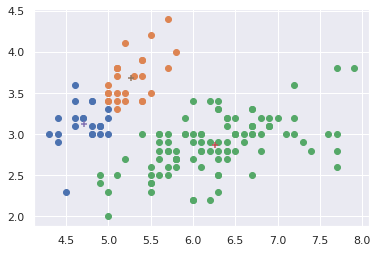

SSE = [125.23438633452663, 122.2274158574224, 121.77664491200503, 121.38904779254548, 121.27836278221008, 121.259693322016]
Original Labels:  {'Iris-setosa': 49, 'Iris-versicolor': 50, 'Iris-virginica': 50}
Predicted Labels:  {'Iris-setosa': 26, 'Iris-versicolor': 50, 'Iris-virginica': 0}
Accuracy = 0.5100671140939598


In [105]:
kmeans = KMeans(d_func=jaccard)
[centroid_centers, clusters] = kmeans.fit(iris_data)

labels = {'Iris-setosa': 0, 'Iris-versicolor': 0, 'Iris-virginica': 0}

for key in clusters:
  d = dict(label_cluster(clusters[key]))
  mx = 0
  s = 0
  label = ""
  for k in d:
    s += d[k]
    if d[k] > mx:
      mx = d[k]
      label = k
  labels[label] = mx

draw_nd_scatter(clusters, centroid_centers)

print("SSE =",kmeans.sse_list)
print("Original Labels: ", original_labels)
print("Predicted Labels: ", labels)

total = 0
mismatch = 0

for l in original_labels:
  total += original_labels[l]
  mismatch += abs(original_labels[l] - labels[l])

accuracy = (total - mismatch) / total

print("Accuracy =",accuracy)

Question 4:

1st Stopping Criteria: No Change in Centroids

In [106]:
kmeans = KMeans(centroid_stop=True)
[centroid_centers, clusters] = kmeans.fit(iris_data)
print(kmeans.sse_list)

Time taken: 0.01366734504699707
Number of iterations: 12
[127.88307166178396, 119.36087529307375, 105.31114686601735, 99.69301049665143, 98.3773878546629, 98.09248458845802, 97.78012517424725, 97.53463660880878, 97.36328582285084, 97.22367033834894, 97.08179358885708, 97.19577229449335]


In [107]:
kmeans = KMeans(centroid_stop=True, d_func=cosine_similarity)
[centroid_centers, clusters] = kmeans.fit(iris_data)
print(kmeans.sse_list)

Time taken: 0.04004859924316406
Number of iterations: 3
[103.91647163596843, 102.91126049046362, 101.42234214063515]


In [108]:
kmeans = KMeans(centroid_stop=True, d_func=jaccard)
[centroid_centers, clusters] = kmeans.fit(iris_data)
print(kmeans.sse_list)

Time taken: 0.07950139045715332
Number of iterations: 6
[219.30800900099425, 156.91446747529687, 111.41089683994798, 100.66709178143309, 97.69080308192541, 97.33688011669413]


# Stopping Criteria: Increase in SSE

In [109]:
kmeans = KMeans(show_sse=True)
[centroid_centers, clusters] = kmeans.fit(iris_data)
print(kmeans.sse_list)

Time taken: 0.007791280746459961
Number of iterations: 3
[183.27127360506435, 98.94235555752758, 97.17547683463661]


In [110]:
kmeans = KMeans(show_sse=True, d_func=cosine_similarity)
[centroid_centers, clusters] = kmeans.fit(iris_data)
print(kmeans.sse_list)

Time taken: 0.036322832107543945
Number of iterations: 3
[106.92814925700964, 103.96806551748617, 102.26916147701174]


In [111]:
kmeans = KMeans(show_sse=True, d_func=jaccard)
[centroid_centers, clusters] = kmeans.fit(iris_data)
print(kmeans.sse_list)

Time taken: 0.07121634483337402
Number of iterations: 4
[98.60479437575573, 97.55398106276955, 97.51126911050592]


## Stopping_Criteria: Max Iterations



Euclidean:

In [112]:
kmeans = KMeans(max_iters=101, show_sse=False, centroid_stop=False)
[centroid_centers, clusters] = kmeans.fit(iris_data)
print(kmeans.sse_list)

Time taken: 0.10483694076538086
Number of iterations: 100
[98.26144636840735, 97.41771519933287, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.17547683463661, 97.1754768

Cosine Similarity:

In [113]:
kmeans = KMeans(max_iters=101, show_sse=False, centroid_stop=False, d_func=cosine_similarity)
[centroid_centers, clusters] = kmeans.fit(iris_data)
print(kmeans.sse_list)

Time taken: 0.7430603504180908
Number of iterations: 100
[125.76072143354912, 125.29129900877265, 125.44399650900382, 125.53666750869704, 125.60060946653442, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.4230798740872, 125.42

Jaccard's Similarity:

In [114]:
kmeans = KMeans(max_iters=101, show_sse=False, centroid_stop=False, d_func=jaccard)
[centroid_centers, clusters] = kmeans.fit(iris_data)
print(kmeans.sse_list)

Time taken: 1.0228936672210693
Number of iterations: 100
[104.82319252919766, 98.23378013387722, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.19939498657202, 98.1993949

Task 3:

In [115]:
red = [(4.7, 3.2), (4.9, 3.1), (5.0, 3.0), (4.6, 2.9)]
blue = [(5.9, 3.2), (6.7, 3.1), (6.0, 3.0), (6.2, 2.8)]

dists = []
d = 0
for r in red:
    for b in blue:
        dists.append([euclidean_distance(r, b), [r, b]])
        d += dists[-1][0]

dists.sort()

print("Q1: Distance is closest points is {:.4f} between points {} and {}".format(dists[0][0], dists[0][1][0], dists[0][1][1]))
print("Q2: Distance to farthest points is {:.4f} between points {} and {}".format(dists[-1][0], dists[-1][1][0], dists[-1][1][1]))
print("Q3: Average of all distances is {:.4f}".format(d/len(dists)))

Q1: Distance is closest points is 0.9220 between points (5.0, 3.0) and (5.9, 3.2)
Q2: Distance to farthest points is 2.1095 between points (4.6, 2.9) and (6.7, 3.1)
Q3: Average of all distances is 1.4129


If even intra-cluster points' distances are considered, then